In [9]:
import csv

# Define weights for each statistic
weights = {
    "xba": 0.30,
    "exit_velocity_avg": 0.20,
    "sweet_spot_percent": 0.15,
    "barrel_batted_rate": 0.15,
    "solidcontact_percent": 0.10,
    "hard_hit_percent": 0.10,
}

# Initialize an empty list to store player data
players = []

# Read data from the CSV file
with open("stats.csv", newline="") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # Convert numeric values from strings to floats
        for stat in weights.keys():
            row[stat.strip()] = float(row[stat.strip()])
        players.append(row)

# Calculate the composite score for each player
for player in players:
    composite_score = sum(player[stat] * weights[stat.strip()] for stat in weights)
    player["Composite Score"] = composite_score

# Find the maximum and minimum composite scores
max_score = max(player["Composite Score"] for player in players)
min_score = min(player["Composite Score"] for player in players)

# Scale the composite scores to be between 0 and 100
for player in players:
    scaled_score = ((player["Composite Score"] - min_score) / (max_score - min_score)) * 100
    player["Scaled Composite Score"] = scaled_score

# Sort players based on their composite scores in descending order
sorted_players = sorted(players, key=lambda x: x["Composite Score"], reverse=True)

# Print the ranked players with scaled composite scores
print("Ranking of Players based on Composite Score:")
for rank, player in enumerate(sorted_players, start=1):
    print(f"{rank}. {player['﻿last_name']}, {player[' first_name']} - Scaled Composite Score: {player['Scaled Composite Score']:.2f}")


Ranking of Players based on Composite Score:
1. Ohtani,  Shohei - Scaled Composite Score: 100.00
2. Olson,  Matt - Scaled Composite Score: 94.99
3. Betts,  Mookie - Scaled Composite Score: 94.24
4. Chapman,  Matt - Scaled Composite Score: 92.55
5. Jung,  Josh - Scaled Composite Score: 88.76
6. Acuna Jr.,  Ronald - Scaled Composite Score: 88.66
7. Garcia,  Adolis - Scaled Composite Score: 84.79
8. Gorman,  Nolan - Scaled Composite Score: 84.08
9. Torkelson,  Spencer - Scaled Composite Score: 83.72
10. Melendez Jr.,  MJ - Scaled Composite Score: 81.06
11. Freeman,  Freddie - Scaled Composite Score: 80.80
12. Mountcastle,  Ryan - Scaled Composite Score: 79.82
13. Riley,  Austin - Scaled Composite Score: 78.29
14. Suwinski,  Jack - Scaled Composite Score: 78.17
15. Soler,  Jorge - Scaled Composite Score: 77.49
16. Rooker Jr.,  Brent - Scaled Composite Score: 77.18
17. Burger,  Jake - Scaled Composite Score: 77.08
18. Guerrero Jr.,  Vladimir - Scaled Composite Score: 76.81
19. Goldschmidt, 

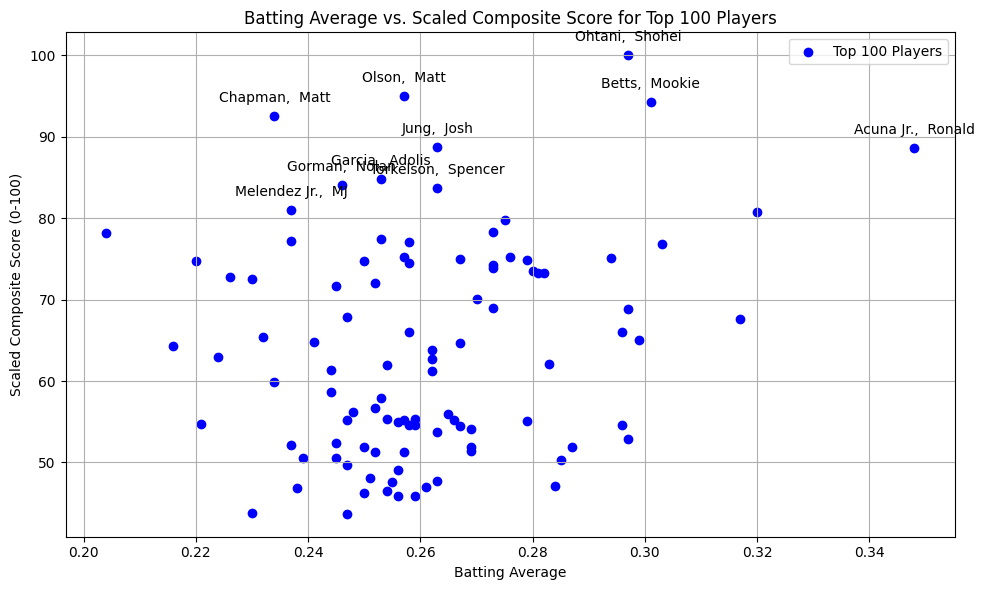

In [12]:
import csv
import matplotlib.pyplot as plt

# Find the maximum and minimum composite scores
max_score = max(composite_scores)
min_score = min(composite_scores)

# Scale the composite scores to be between 0 and 100
scaled_composite_scores = [((score - min_score) / (max_score - min_score)) * 100 for score in composite_scores]

# Extract the top 100 players' scaled composite scores and batting averages for plotting
top_100_scaled_composite_scores = scaled_composite_scores[:100]

# Extract the top 10 players' names and scaled composite scores for plotting
top_10_scaled_composite_scores = scaled_composite_scores[:10]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(batting_averages, top_100_scaled_composite_scores, c='blue', marker='o', label='Top 100 Players')
plt.xlabel('Batting Average')
plt.ylabel('Scaled Composite Score (0-100)')
plt.title('Batting Average vs. Scaled Composite Score for Top 100 Players')

# Add labels for individual points (player names) for the top 10 players
for i, player_name in enumerate(top_10_player_names):
    plt.annotate(player_name, (batting_averages[i], top_10_scaled_composite_scores[i]), textcoords="offset points", xytext=(0, 10), ha='center')

# Show the scatter plot
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
